## Model Fitting and Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train = pd.read_csv('../datasets/eda_feature_engineered.csv')
test = pd.read_csv('../datasets/test_cleaned.csv')

In [5]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total_Sqft
0,60,1,74.0,13517,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,1,TA,CBlock,2,2,2,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,1,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,4,4,Y,0,44,0,0,0,0,1,Na,Na,0,3,2010,WD,130500,2248.0
1,60,1,43.0,11492,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,1,TA,PConc,3,2,2,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,1,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,4,4,Y,0,74,0,0,0,0,1,Na,Na,0,4,2009,WD,220000,3109.0
2,20,1,68.0,7922,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,Gd,CBlock,2,2,2,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,4,4,Y,0,52,0,0,0,0,1,Na,Na,0,1,2010,WD,109000,2166.0
3,60,1,73.0,9802,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,TA,PConc,3,2,2,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,4,4,Y,100,0,0,0,0,0,1,Na,Na,0,4,2010,WD,174000,1928.0
4,50,1,82.0,14235,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,2,TA,PConc,4,3,2,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,4,4,N,0,59,0,0,0,0,1,Na,Na,0,3,2010,WD,138500,2180.0


In [6]:
train.corr(numeric_only = True)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,Yr Sold,SalePrice,Total_Sqft
MS SubClass,1.000000,0.271709,-0.407929,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.002886,-0.040306,0.039534,-0.011042,0.054662,-0.060425,-0.068129,-0.139292,-0.224700,0.008136,-0.246212,0.305771,0.031091,0.068210,0.025727,-0.017030,0.142087,0.179404,-0.003516,0.252111,0.034490,-0.055118,-0.110687,-0.049285,-0.108378,-0.097557,-0.114715,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.009025,-0.027485,0.013027,-0.032870,-0.087335,-0.079062
MS Zoning,0.271709,1.000000,-0.252965,-0.190837,-0.096255,-0.026240,-0.151416,-0.045303,-0.088755,0.047271,-0.037565,0.062927,-0.123373,-0.129872,-0.089351,-0.012808,-0.178560,0.037197,-0.206798,0.087675,0.075320,-0.081562,-0.084801,-0.070945,-0.038149,-0.033953,-0.112006,0.049978,-0.113353,-0.198846,-0.112521,-0.138246,-0.123632,-0.129117,-0.135495,-0.135989,0.078956,0.070961,-0.002557,-0.070263,-0.027886,-0.028097,-0.025670,0.034517,0.003964,-0.160131,-0.155658
Lot Frontage,-0.407929,-0.252965,1.000000,0.394907,0.171598,-0.035651,0.095087,0.066754,0.195996,0.021751,0.119746,-0.025346,0.157384,0.198503,0.039632,0.114505,0.331276,-0.078627,0.430305,0.013116,0.004424,0.352488,0.100637,-0.022416,0.136841,0.036511,0.221965,0.016614,0.346159,0.228607,0.087121,0.276125,0.339636,0.097618,0.093784,0.104506,0.170666,-0.002993,0.031024,0.072708,0.139538,0.150921,0.050134,-0.021192,0.018131,0.320666,0.397107
Lot Area,-0.245484,-0.190837,0.394907,1.000000,0.105824,-0.019185,0.036002,0.050771,0.167480,0.015784,0.078601,-0.031099,0.195341,0.215648,0.041799,0.041544,0.277478,-0.027781,0.381593,0.029398,0.001273,0.327427,0.113283,0.029157,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.086127,0.214972,0.263274,0.101168,0.091769,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.129200,0.093922,0.003197,-0.029454,0.296566,0.360801
Overall Qual,0.035763,-0.096255,0.171598,0.105824,1.000000,-0.082770,0.602964,0.584654,0.429777,-0.361128,0.598859,0.004655,0.361400,0.279223,-0.027973,0.276437,0.549407,-0.400552,0.477136,0.228152,-0.052338,0.566701,0.175896,-0.047006,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.276306,0.587575,0.563994,0.298877,0.285385,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.019568,0.022099,0.019242,-0.011578,0.800207,0.666057
Overall Cond,-0.070141,-0.026240,-0.035651,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.131087,0.086822,-0.223251,-0.001255,-0.077800,-0.046348,0.047605,-0.131225,-0.159856,0.044370,-0.150938,0.010912,0.004753,-0.109804,-0.040107,0.099918,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,0.016899,-0.168660,-0.138113,0.037139,0.044571,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,-0.008272,0.014269,-0.003144,0.047664,-0.097019,-0.146553
Year Built,0.035983,-0.151416,0.095087,0.036002,0.602964,-0.370988,1.000000,0.629116,0.320100,-0.435307,0.524843,-0.127559,0.316676,0.275728,-0.020906,0.137114,0.410605,-0.419884,0.323315,0.022313,-0.159403,0.258838,0.215590,-0.031299,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.272756,0.542862,0.487718,0.298480,0.282467,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.008823,0.000626,-0.007083,-0.003559,0.571849,0.413040
Year Remod/Add,0.044836,-0.045303,0.066754,0.050771,0.584654,0.042614,0.629116,1.000000,0.204157,-0.425818,0.481773,-0.011046,0.252735,0.167296,-0.056894,0.160910,0.309795,-0.433393,0.244190,0.159605,-0.066577,0.322407,0.153771,-0.037763,0.471555,0.224106,-0.019

In [7]:
#checking overall interaction between 'overall quality' and year Remod/Add

In [8]:
train['Year Remod/Add * Overall Qual'] = train['Year Remod/Add'] * train['Overall Qual']

In [9]:
print(train.columns)

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [10]:
features = ['Total_Sqft','Lot Area','Year Remod/Add','Overall Qual','Bsmt Unf SF','Year Remod/Add * Overall Qual']
X = train[features] 
y = train['SalePrice']

In [11]:
X.corr()

,Total_Sqft,Lot Area,Year Remod/Add,Overall Qual,Bsmt Unf SF,Year Remod/Add * Overall Qual
Total_Sqft,1.000000,0.360801,0.396580,0.666057,0.348283,0.666693
Lot Area,0.360801,1.000000,0.050771,0.105824,0.041544,0.105641
Year Remod/Add,0.396580,0.050771,1.000000,0.584654,0.160910,0.610971
Overall Qual,0.666057,0.105824,0.584654,1.000000,0.276437,0.999418
Bsmt Unf SF,0.348283,0.041544,0.160910,0.276437,1.000000,0.277148
Year Remod/Add * Overall Qual,0.666693,0.105641,0.610971,0.999418,0.277148,1.000000


<Axes: >

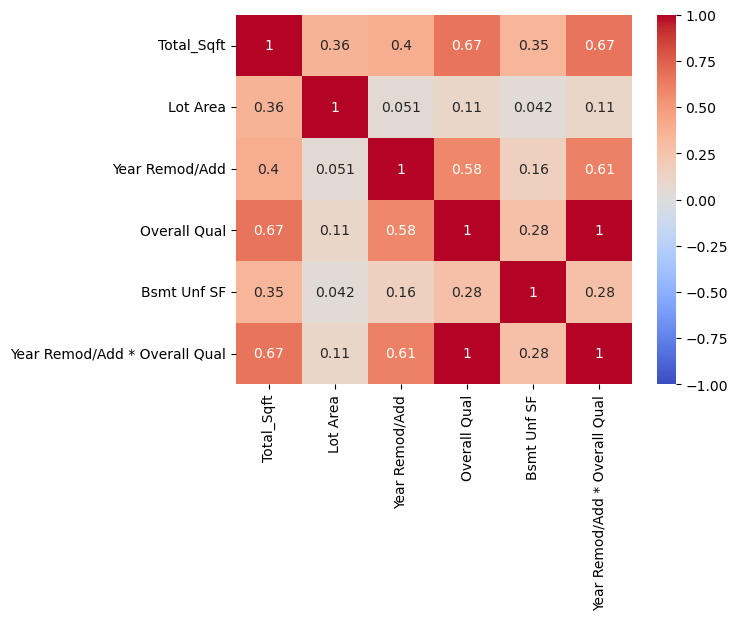

In [12]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

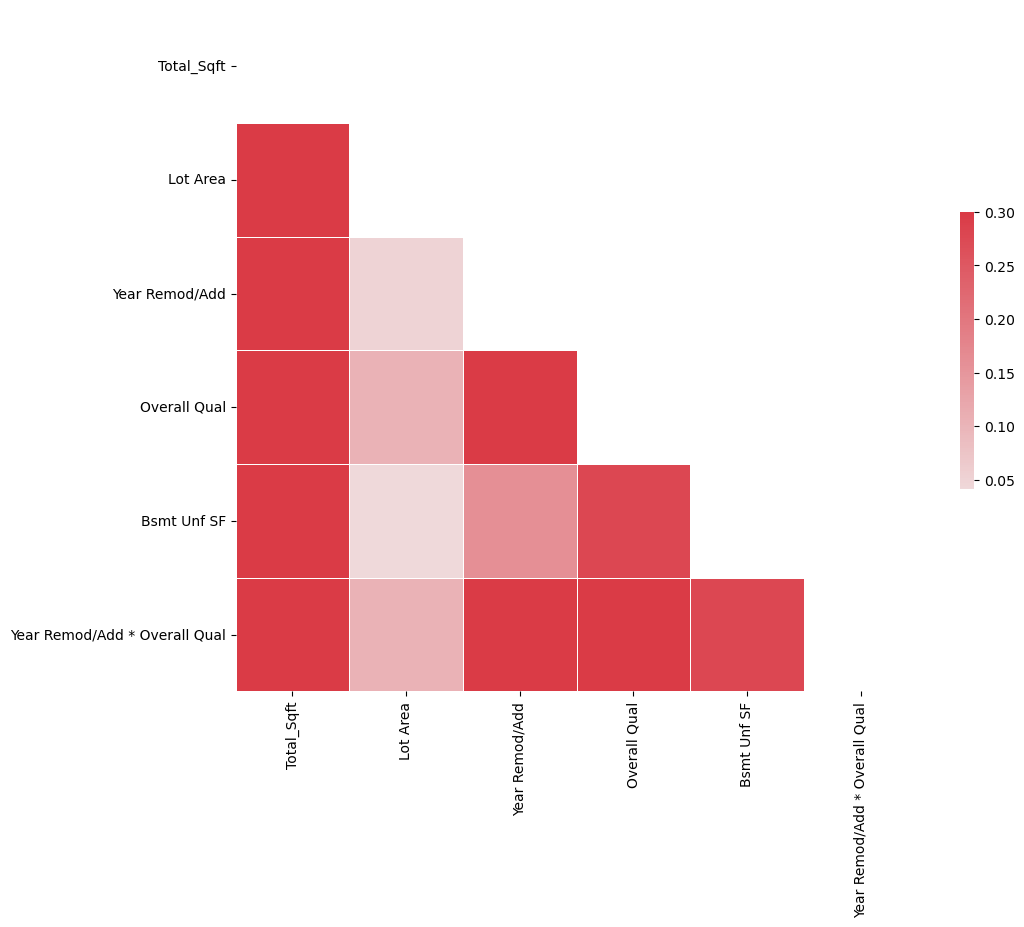

In [13]:
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Change np.bool to bool
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.4, cbar_kws={"shrink": .4})

## LinearRegression

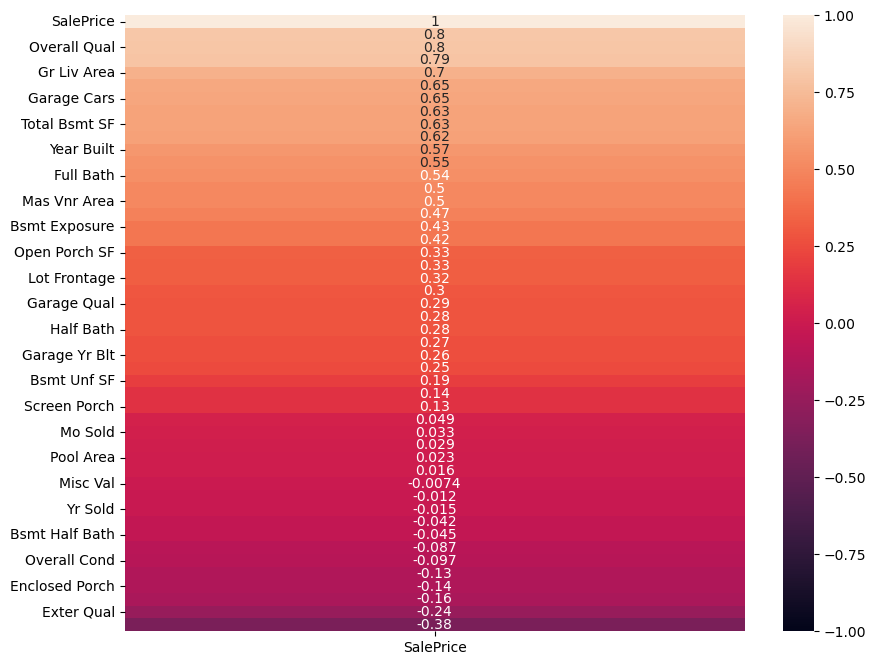

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(numeric_only = True)[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True,
           vmin=-1,
           vmax=1);

In [15]:
#Create the model

In [16]:
#set up X and y

In [17]:
X = train[['Overall Qual']]
y = train['SalePrice']

In [18]:
# Train Test Split - Let's see how our model performs on unseen data before making predictions on the test.csv (df_test)!

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [19]:
#initiate
lr = LinearRegression()

In [20]:
#Fit on Training data
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
#Evaluate on training and testing sets

#train score
lr.score(X_train, y_train)

0.6333219308225758

In [22]:
#test Score
lr.score(X_test, y_test)

0.6617682426512025

In [23]:
# Refit using all of the data in train.csv
lr.fit(X,y)

LinearRegression()

In [24]:
#Make sale price predictions on homes that were in my test.csv

preds = lr.predict(test[['Overall Qual']])

preds.shape              

(878,)

In [25]:
#Create SalePrice column in df_test

In [26]:
test['SalePrice'] = preds


In [27]:
test.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,190,2,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,3,2,Stone,5,2,2,Unf,0,Unf,0,1020,1020,GasA,3,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,Typ,0,1,Detchd,1910.0,Unf,1,440.0,2,2,Y,0,60,112,0,0,0,0.0,Na,Na,0,4,2006,WD,176483.047320
1,2718,90,1,82.0,9662,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,3,3,CBlock,4,2,2,Unf,0,Unf,0,1967,1967,GasA,2,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,Typ,0,1,Attchd,1977.0,Fin,2,580.0,4,4,Y,170,0,0,0,0,0,0.0,Na,Na,0,8,2006,WD,132015.099723
2,2414,60,1,58.0,17104,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,3,PConc,4,3,4,GLQ,554,Unf,0,100,654,GasA,1,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,Typ,1,5,Attchd,2006.0,RFn,2,426.0,4,4,Y,100,24,0,0,0,0,0.0,Na,Na,0,9,2006,New,220950.994917
3,1989,30,2,60.0,8520,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,2,3,CBlock,3,2,2,Unf,0,Unf,0,968,968,GasA,2,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,Typ,0,1,Detchd,1935.0,Unf,2,480.0,3,4,N,0,0,184,0,0,0,0.0,Na,Na,0,7,2007,WD,132015.099723
4,625,20,1,84.0,9500,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,2,2,BLQ,609,Unf,0,785,1394,GasA,3,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,3,6,Typ,2,5,Attchd,1963.0,RFn,2,514.0,4,4,Y,0,76,0,0,185,0,0.0,Na,Na,0,7,2009,WD,176483.047320


In [28]:
#Create DataFrame with only ID and SalePrice columns from df_test

In [29]:
lr_submission = test[['Id', 'SalePrice']]

In [30]:
#check before submitting
lr_submission.head()

,Id,SalePrice
0,2658,176483.047320
1,2718,132015.099723
2,2414,220950.994917
3,1989,132015.099723
4,625,176483.047320


In [31]:
#Set Index to Id
lr_submission.set_index('Id', inplace=True)

In [32]:
# Check 
lr_submission.head()

,SalePrice
Id,
2658,176483.047320
2718,132015.099723
2414,220950.994917
1989,132015.099723
625,176483.047320


In [33]:
lr_submission.to_csv('../Data_Submission/one_submission.csv')

### Test another model

In [34]:
# Set up X and y

X = train[['Year Built']]
y = train['SalePrice']

In [35]:
#Train Test Split - Let's see how our model performs on unseen data before making predictions on the test.csv (df_test)!

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [36]:
# Instantiate
lr = LinearRegression()

In [37]:
# Fit on training data!
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
#Evaluate on training and testing sets

#train score
lr.score(X_train, y_train)

0.31485104910486383

In [39]:
#test Score
lr.score(X_test, y_test)

0.3637837013597105

In [40]:
# Refit using all of the data in train.csv
lr.fit(X,y)

LinearRegression()

In [41]:
#Make sale price predictions on homes that were in my test.csv

preds = lr.predict(test[['Year Built']])

preds.shape  

(878,)

In [42]:
test['SalePrice'] = preds

In [43]:
test.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,190,2,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,3,2,Stone,5,2,2,Unf,0,Unf,0,1020,1020,GasA,3,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,Typ,0,1,Detchd,1910.0,Unf,1,440.0,2,2,Y,0,60,112,0,0,0,0.0,Na,Na,0,4,2006,WD,88789.469173
1,2718,90,1,82.0,9662,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,3,3,CBlock,4,2,2,Unf,0,Unf,0,1967,1967,GasA,2,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,Typ,0,1,Attchd,1977.0,Fin,2,580.0,4,4,Y,170,0,0,0,0,0,0.0,Na,Na,0,8,2006,WD,189416.336796
2,2414,60,1,58.0,17104,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,3,PConc,4,3,4,GLQ,554,Unf,0,100,654,GasA,1,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,Typ,1,5,Attchd,2006.0,RFn,2,426.0,4,4,Y,100,24,0,0,0,0,0.0,Na,Na,0,9,2006,New,232971.249647
3,1989,30,2,60.0,8520,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,2,3,CBlock,3,2,2,Unf,0,Unf,0,968,968,GasA,2,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,Typ,0,1,Detchd,1935.0,Unf,2,480.0,3,4,N,0,0,184,0,0,0,0.0,Na,Na,0,7,2007,WD,108314.085279
4,625,20,1,84.0,9500,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,2,2,BLQ,609,Unf,0,785,1394,GasA,3,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,3,6,Typ,2,5,Attchd,1963.0,RFn,2,514.0,4,4,Y,0,76,0,0,185,0,0.0,Na,Na,0,7,2009,WD,168389.827143


In [44]:
#Create DataFrame with only ID and SalePrice columns from df_test

In [45]:
lr_submission = test[['Id', 'SalePrice']]

In [46]:
#check before submitting
lr_submission.head()

,Id,SalePrice
0,2658,88789.469173
1,2718,189416.336796
2,2414,232971.249647
3,1989,108314.085279
4,625,168389.827143


In [47]:
#Set Index to Id
lr_submission.set_index('Id', inplace=True)

In [48]:
#check before submitting
lr_submission.head()

,SalePrice
Id,
2658,88789.469173
2718,189416.336796
2414,232971.249647
1989,108314.085279
625,168389.827143


In [49]:
lr_submission.to_csv('../Data_Submission/yearbuilt_submission.csv')

## Scaler

In [50]:
#again
features = ['Total_Sqft','Lot Area','Year Remod/Add','Overall Qual','Bsmt Unf SF','Year Remod/Add * Overall Qual', 'Year Built']
X = train[features] 
y = train['SalePrice']

In [51]:
X.corr()

,Total_Sqft,Lot Area,Year Remod/Add,Overall Qual,Bsmt Unf SF,Year Remod/Add * Overall Qual,Year Built
Total_Sqft,1.000000,0.360801,0.396580,0.666057,0.348283,0.666693,0.413040
Lot Area,0.360801,1.000000,0.050771,0.105824,0.041544,0.105641,0.036002
Year Remod/Add,0.396580,0.050771,1.000000,0.584654,0.160910,0.610971,0.629116
Overall Qual,0.666057,0.105824,0.584654,1.000000,0.276437,0.999418,0.602964
Bsmt Unf SF,0.348283,0.041544,0.160910,0.276437,1.000000,0.277148,0.137114
Year Remod/Add * Overall Qual,0.666693,0.105641,0.610971,0.999418,0.277148,1.000000,0.615038
Year Built,0.413040,0.036002,0.629116,0.602964,0.137114,0.615038,1.000000


In [52]:
ss= StandardScaler()
ss.fit(X)

StandardScaler()

In [53]:
print(ss.mean_)

[2.69267967e+03 1.00652082e+04 1.98419015e+03 6.11214042e+00
 5.67451487e+02 1.21451819e+04 1.97170892e+03]


In [54]:
ss = StandardScaler()
ss.fit(X)
print('means', ss.mean_)
print('stds', ss.scale_)
X_scaled = ss.transform(X)
X_scaled[:6]

means [2.69267967e+03 1.00652082e+04 1.98419015e+03 6.11214042e+00
 5.67451487e+02 1.21451819e+04 1.97170892e+03]
stds [8.81274512e+02 6.74084500e+03 2.10311213e+01 1.42592280e+00
 4.44914344e+02 2.90781366e+03 3.01705313e+01]


array([[-0.50458701,  0.51207108,  0.98947881, -0.0786441 , -0.84387364,
        -0.03961116,  0.14222744],
       [ 0.47240709,  0.21166364,  0.60909015,  0.62265614, -0.65507325,
         0.63065187,  0.80512594],
       [-0.59763406, -0.31794355,  1.08457597, -0.77994434, -0.54269207,
        -0.72569363, -0.62010583],
       [-0.86769747, -0.03904677,  1.08457597, -0.77994434, -0.4123299 ,
        -0.72569363,  1.1365752 ],
       [-0.58174798,  0.61858592,  0.41889582, -0.0786441 ,  0.2439762 ,
        -0.06437203, -2.37678686],
       [ 0.80828428,  0.95341041,  0.84683306, -0.0786441 , -0.02349101,
        -0.04580137, -0.18922181]])

In [55]:
#Generate Regression Model and model validation

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
X_train.head()

,Total_Sqft,Lot Area,Year Remod/Add,Overall Qual,Bsmt Unf SF,Year Remod/Add * Overall Qual,Year Built
532,3218.0,10667,1971,6,749.0,11826,1971
415,3793.0,12888,1980,7,717.0,13860,1937
273,1922.0,7200,2002,5,317.0,10010,1950
1460,3906.0,14000,1997,7,105.0,13979,1996
250,4022.0,11929,1995,8,1242.0,15960,1995


In [58]:
train.shape

(2051, 81)

In [59]:
X_train.shape

(1538, 7)

In [60]:
y_train.shape

(1538,)

In [61]:
X_test.shape

(513, 7)

In [62]:
y_test.shape

(513,)

In [63]:
y_train.head()

532     167300
415     219000
273     129000
1460    328000
250     290000
Name: SalePrice, dtype: int64

/Users/rajashreechoudhary/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


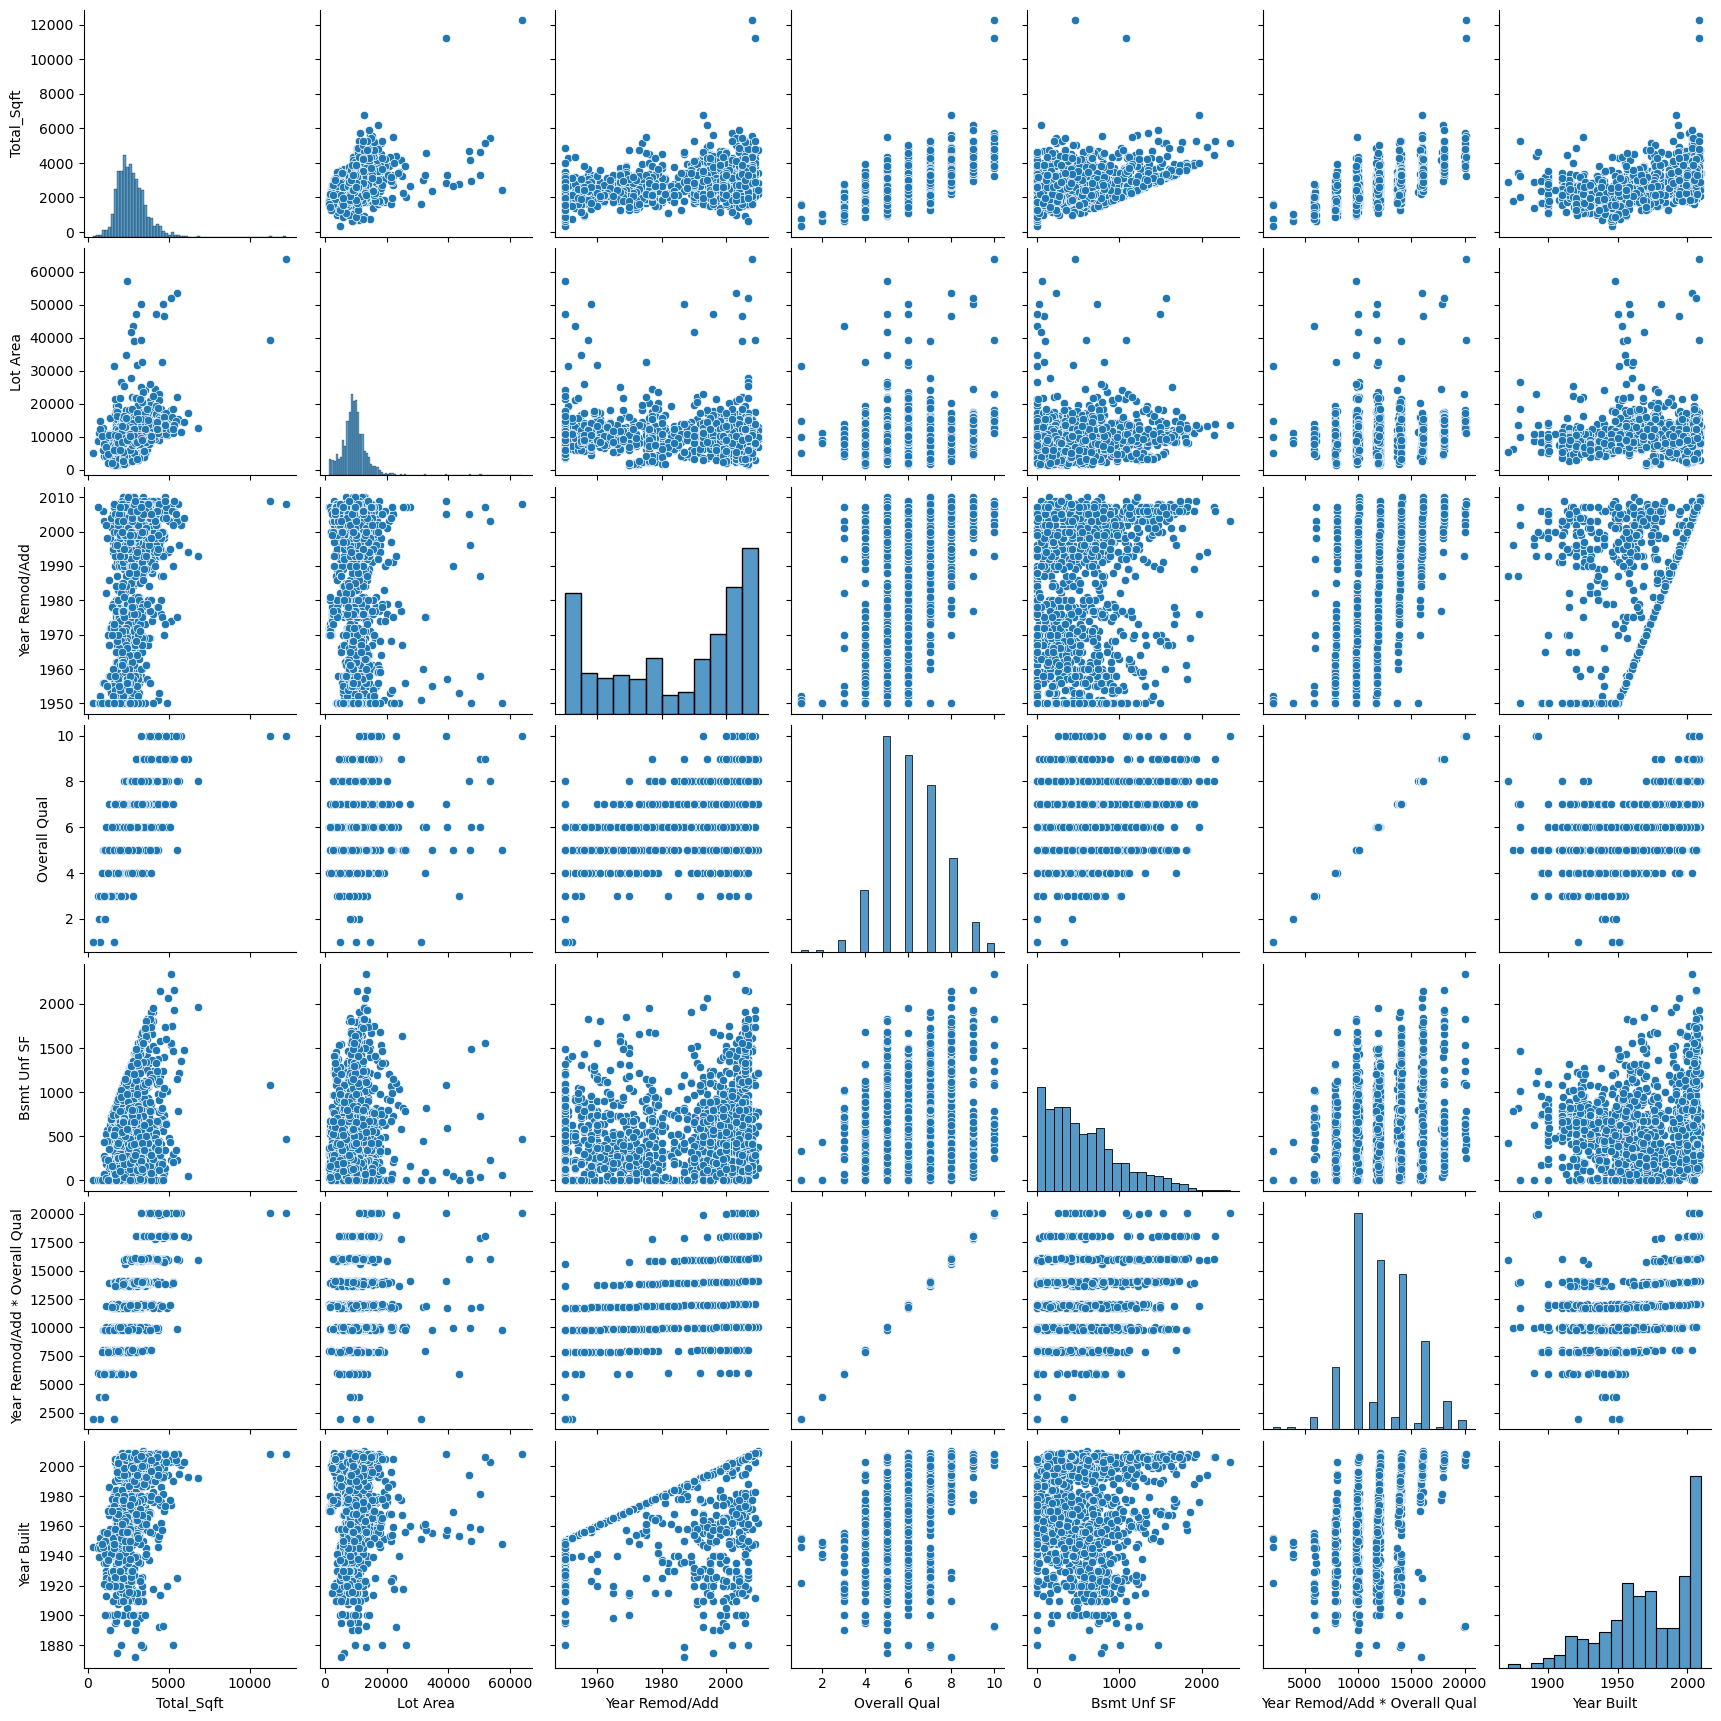

In [64]:
sns.pairplot(X_train)

In [65]:
#there are quite a fe features to show correlation to SalePrice, such as Total_Sqft, Year Remod/Add,
#overall qual, bsmt Unf SF, lot area, year built

In [66]:
#Starting with year built

In [67]:
X_train.fillna(X_train.mean(), inplace=True)

In [68]:
y_train.fillna(y_train.mean(), inplace=True)

In [69]:
y_test.fillna(y_test.mean(), inplace=True)

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
##Model evaluation & Baseline score


In [73]:
lr.score(X_test,y_test)

0.8575785754901016

In [74]:
lr.score(X_train, y_train)

0.7991691070491058

Model is slightly overfit as the test score is .85 and the train score is .79.

In [75]:
lr.coef_

array([ 3.47828066e+01,  1.38340172e+00, -2.09470346e+03, -8.63461071e+05,
       -2.11710939e+01,  4.46840817e+02,  1.43733799e+02])

In [76]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.7733952669241017

Cross value score of training set is .77

In [77]:
def adjusted_r2(n, p, y, y_preds):
    return 1 - (1 - r2_score(y, y_preds)) * ((n-1) / (n - p - 1))

In [78]:
def scores(model, X, y):
    print(f'r2 score: {r2_score(y, lr.predict(X))}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, lr.predict(X)))}')

In [79]:
train_preds = lr.predict(X_test)
train_preds[:10]
r2_score(y_test, train_preds)

0.8575785754901016

In [80]:
print('Training Scores:')
scores(lr, X_train, y_train)
print(f'adjusted r2 score: {adjusted_r2(X_train.shape[0], X_train.shape[1], y_train, lr.predict(X_train))}')

Training Scores:
r2 score: 0.7991691070491058
RMSE: 35639.290742419165
adjusted r2 score: 0.79825027289835


In [81]:
preds = lr.predict(X_test)

In [82]:
residuals = y_test - preds

(array([  1.,   1.,   7.,  30., 154., 232.,  55.,  23.,   4.,   6.]),
 array([-141525.30521431, -114788.69235233,  -88052.07949036,
         -61315.46662838,  -34578.8537664 ,   -7842.24090442,
          18894.37195755,   45630.98481953,   72367.59768151,
          99104.21054349,  125840.82340547]),
 <BarContainer object of 10 artists>)

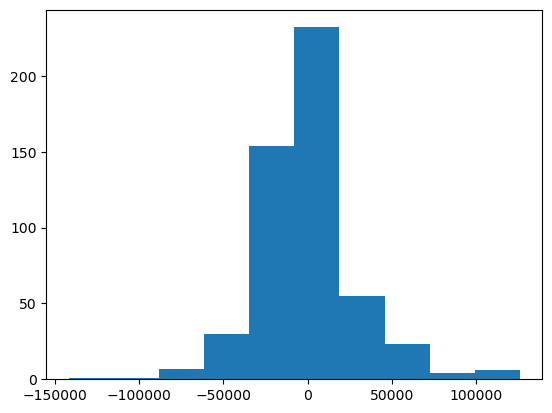

In [83]:
plt.hist(residuals)

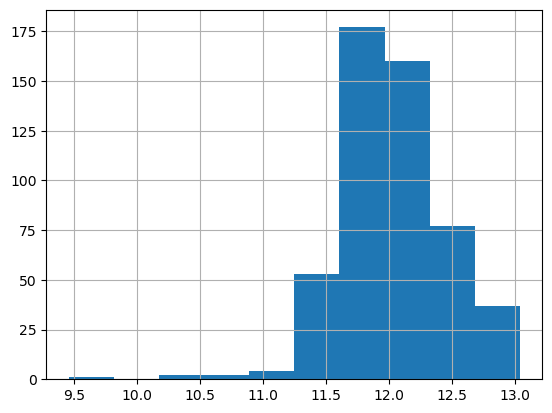

In [84]:
np.log(y_test).hist();

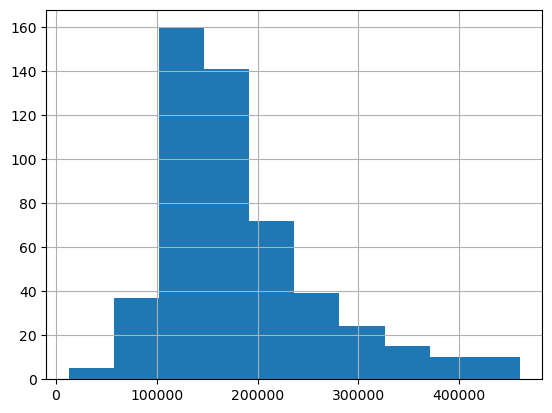

In [85]:
np.exp(np.log(y_test)).hist();

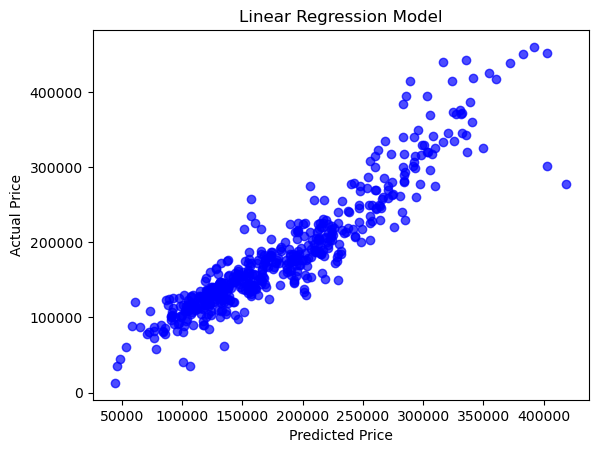

In [86]:
actual_values = y_test
plt.scatter(preds, actual_values, alpha=.7,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

From the above graph we can see that how predicted price and the actual price is correlated.

In [87]:
#hypothesis testing

In [88]:
features = ['Total_Sqft','Lot Area','Year Remod/Add','Overall Qual','Bsmt Unf SF','Year Remod/Add * Overall Qual', 'Year Built']
X = train[features] 
X = sm.add_constant(X)

In [89]:
X.fillna(X.mean(), inplace=True)

In [90]:
model=sm.OLS(y,X).fit()

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1285.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        05:12:14   Log-Likelihood:                -24316.
No. Observations:                2051   AIC:                         4.865e+04
Df Residuals:                    2043   BIC:                         4.869e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3.814e+06   3.41e+05     11.174      0.000    3.14e+06    4.48e+06
Total_Sqft                       39.0549      1.290     30.264      0.000      36.524      41.586
Lot Area                          1.0067      0.123      8.191      0.000       0.766       1.248
Year Remod/Add                -2102.9146    166.600    -12.623      0.000   -2429.638   -1776.191
Overall Qual                  -8.538e+05   5.79e+04    -14.737      0.000   -9.67e+05    -7.4e+05
Bsmt Unf SF                     -22.2822      1.829    -12.183      0.000     -25.869     -18.695
Year Remod/Add * Overall Qual   441.5303     29.168     15.138      0.000     384.329     498.732
Year Built                      149.1100     35.385      4.214      0.000      79.716     218.504
==============================================================================
Omnibus:                     1700.159   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398345.640
Skew:                          -3.016   Prob(JB):                         0.00
Kurtosis:                      71.007   Cond. No.                     7.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#test the set

In [93]:
test.head()


,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,190,2,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,3,2,Stone,5,2,2,Unf,0,Unf,0,1020,1020,GasA,3,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,Typ,0,1,Detchd,1910.0,Unf,1,440.0,2,2,Y,0,60,112,0,0,0,0.0,Na,Na,0,4,2006,WD,88789.469173
1,2718,90,1,82.0,9662,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,3,3,CBlock,4,2,2,Unf,0,Unf,0,1967,1967,GasA,2,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,Typ,0,1,Attchd,1977.0,Fin,2,580.0,4,4,Y,170,0,0,0,0,0,0.0,Na,Na,0,8,2006,WD,189416.336796
2,2414,60,1,58.0,17104,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,3,PConc,4,3,4,GLQ,554,Unf,0,100,654,GasA,1,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,Typ,1,5,Attchd,2006.0,RFn,2,426.0,4,4,Y,100,24,0,0,0,0,0.0,Na,Na,0,9,2006,New,232971.249647
3,1989,30,2,60.0,8520,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,2,3,CBlock,3,2,2,Unf,0,Unf,0,968,968,GasA,2,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,Typ,0,1,Detchd,1935.0,Unf,2,480.0,3,4,N,0,0,184,0,0,0,0.0,Na,Na,0,7,2007,WD,108314.085279
4,625,20,1,84.0,9500,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,2,2,BLQ,609,Unf,0,785,1394,GasA,3,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,3,6,Typ,2,5,Attchd,1963.0,RFn,2,514.0,4,4,Y,0,76,0,0,185,0,0.0,Na,Na,0,7,2009,WD,168389.827143


In [94]:
test.shape

(878, 80)

In [95]:
train.shape

(2051, 81)

In [96]:
test['Year Remod/Add * Overall Qual'] = test['Year Remod/Add'] * test['Overall Qual']

In [97]:
test['Total_Sqft']= test['Total Bsmt SF']+test['Wood Deck SF']+test['Open Porch SF']+test['1st Flr SF']+test['2nd Flr SF']

In [98]:
#Answer

In [99]:
X_test.shape

(513, 7)

In [100]:
X_test = test[['Total_Sqft','Lot Area','Year Remod/Add','Overall Qual','Bsmt Unf SF','Year Remod/Add * Overall Qual', 'Year Built']]
y_hat = lr.predict(X_test)


In [101]:
X_test.shape

(878, 7)

In [102]:
my_submission2 = pd.DataFrame({'Id': test['Id'],'SalePrice': y_hat,})
my_submission2.head()

,Id,SalePrice
0,2658,142114.695577
1,2718,166425.152960
2,2414,226611.340472
3,1989,106869.999303
4,625,157816.766383


In [103]:
my_submission2.to_csv('../Data_Submission/submission_ss.csv',index=False)